Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')

C:\Users\arwa\AppData\Local\Temp\ipykernel_17516\2912640508.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')


In [3]:
import sys
sys.path.append('..')
from src.eda import (calculate_segmented_loss_ratio,plot_loss_ratio_by_segment,plot_numerical_distribution,plot_categorical_distribution,analyze_zipcode_associations,plot_zipcode_association,plot_outliers_box,analyze_temporal_trends_simple,plot_composition_by_province)

Data Structure Review

In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
df.shape

(1000098, 52)

In [6]:
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

Data Quality Check: Check For Missing Value

In [8]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

Data Summarization

In [9]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


Calculate The Overall Loss Ratio

In [10]:
total_claims = df['TotalClaims'].sum()
total_premium = df['TotalPremium'].sum()
overall_loss_ratio = total_claims/total_premium

print(f"the overall loss ratio is:  \nOverall_Loss_ratio = {overall_loss_ratio:.4f}")

the overall loss ratio is:  
Overall_Loss_ratio = 1.0477


In [11]:
overall_loss_ratio_percentage = overall_loss_ratio * 100
print(f"the overall loss ratio in percentage is \n{overall_loss_ratio_percentage:.2f}%")

the overall loss ratio in percentage is 
104.77%


How Does Overall Loss Ratio Vary by Province, VehicleType, and Gender?

Loss Ratio By Province

In [12]:
loss_ratio_by_province = calculate_segmented_loss_ratio(df,'Province')
print(f"the loss ratio by province is(top 5): \n {loss_ratio_by_province.head(5)} ")

the loss ratio by province is(top 5): 
         Province   TotalClaims  TotalPremium   LossRatio
2        Gauteng  2.939415e+07  2.405377e+07  122.201812
3  KwaZulu-Natal  1.430138e+07  1.320908e+07  108.269332
8   Western Cape  1.038977e+07  9.806559e+06  105.947196
6     North West  5.920250e+06  7.490508e+06   79.036694
5     Mpumalanga  2.044675e+06  2.836292e+06   72.089735 


Loss Ratio By Gender

In [13]:
loss_ratio_by_gender = calculate_segmented_loss_ratio(df,'Gender')
print(f"the loss ratio by Gender is: \n {loss_ratio_by_gender} ")


the loss ratio by Gender is: 
           Gender   TotalClaims  TotalPremium   LossRatio
2  Not specified  6.271410e+07  5.920275e+07  105.931060
1           Male  1.396704e+06  1.580143e+06   88.390993
0         Female  2.502461e+05  3.044806e+05   82.187876 


Loss Ratio By vehicle Type

In [14]:
loss_ratio_by_vehicle_type = calculate_segmented_loss_ratio(df,'VehicleType')
print(f"the loss ratio by vehicle type is (top 5) : \n {loss_ratio_by_vehicle_type.head(5)} ")

the loss ratio by vehicle type is (top 5) : 
          VehicleType   TotalClaims  TotalPremium   LossRatio
1   Heavy Commercial  7.504746e+05  4.609479e+05  162.811164
3  Medium Commercial  4.119867e+06  3.922746e+06  105.025086
4  Passenger Vehicle  5.937207e+07  5.664202e+07  104.819837
2   Light Commercial  6.045250e+04  2.604975e+05   23.206555
0                Bus  7.996535e+03  5.824474e+04   13.729197 


Visualization and Interpretation Of loss Ratio results

plot of loss ratio by province

c:\Users\arwa\insurance-risk-analysis\notebooks\..\src\eda.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


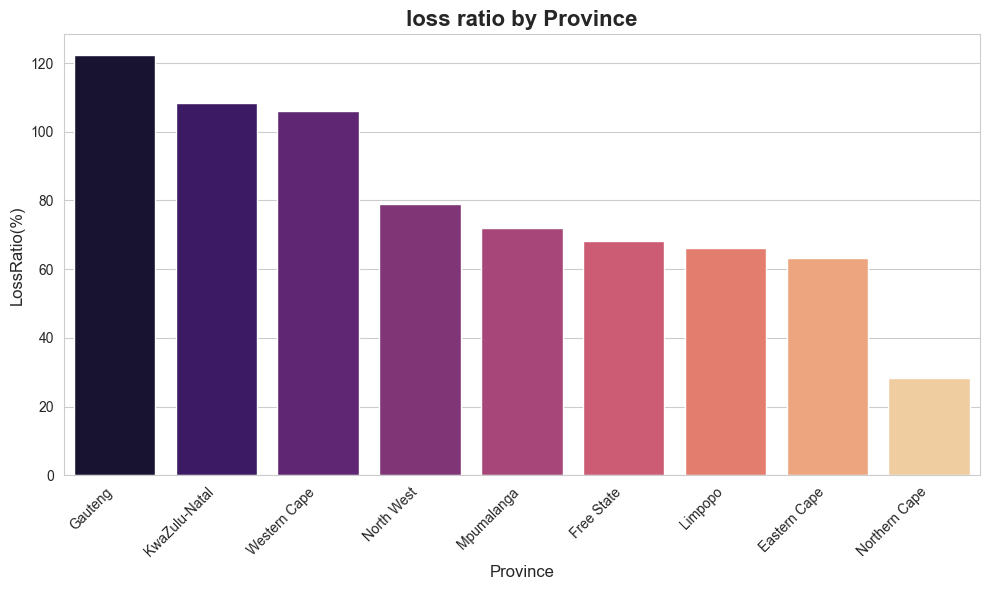

In [15]:
plot_loss_ratio_by_segment(loss_ratio_by_province,'Province','Province')

plot loss ratio by gender

c:\Users\arwa\insurance-risk-analysis\notebooks\..\src\eda.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


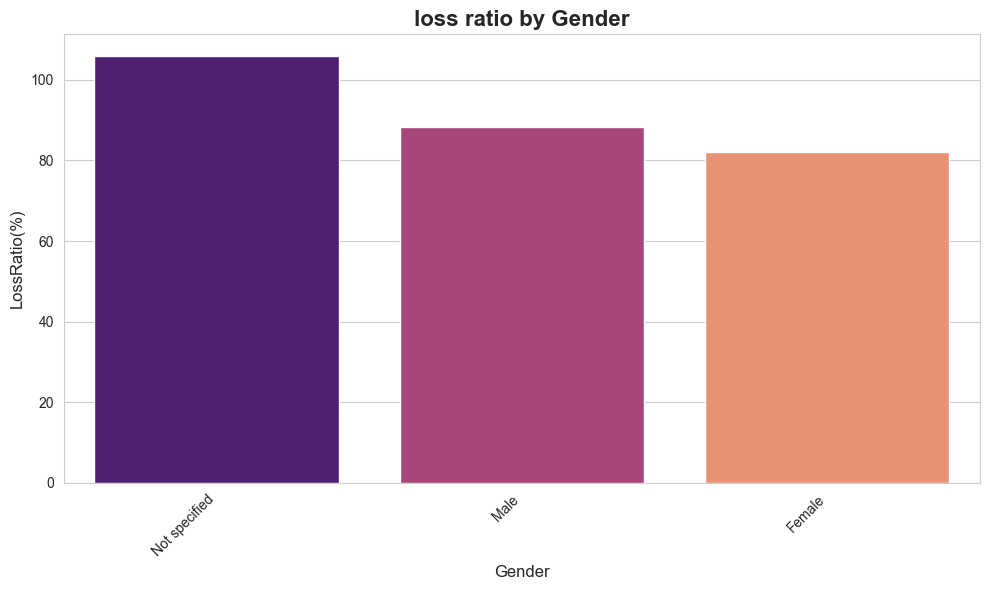

In [16]:
plot_loss_ratio_by_segment(loss_ratio_by_gender,'Gender','Gender')


plot ratio by vehicle type

c:\Users\arwa\insurance-risk-analysis\notebooks\..\src\eda.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


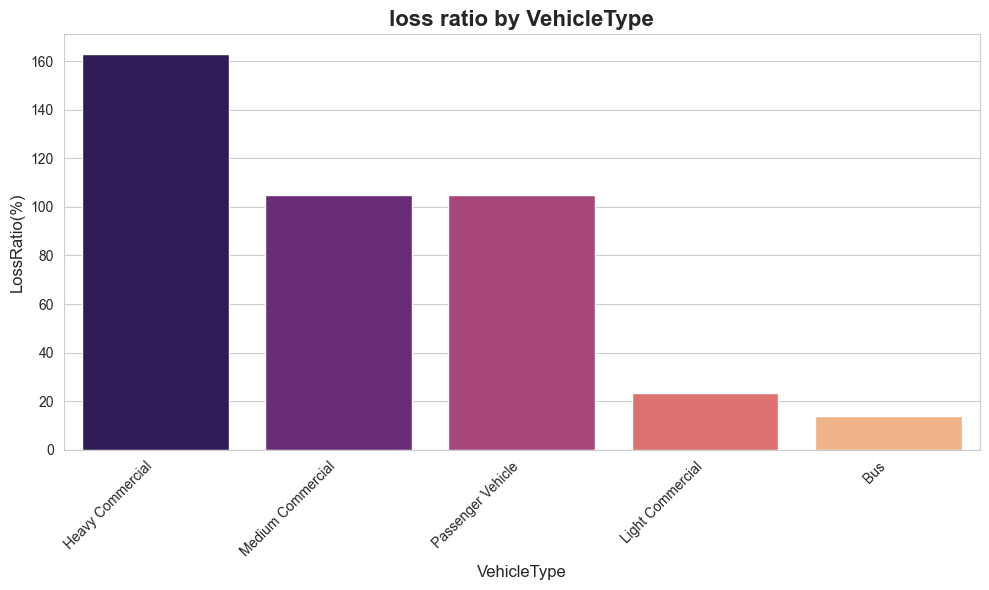

In [17]:
plot_loss_ratio_by_segment(loss_ratio_by_vehicle_type,'VehicleType','VehicleType')

Univariate Analysis

Analyze Numerical Distribution(Histograms)

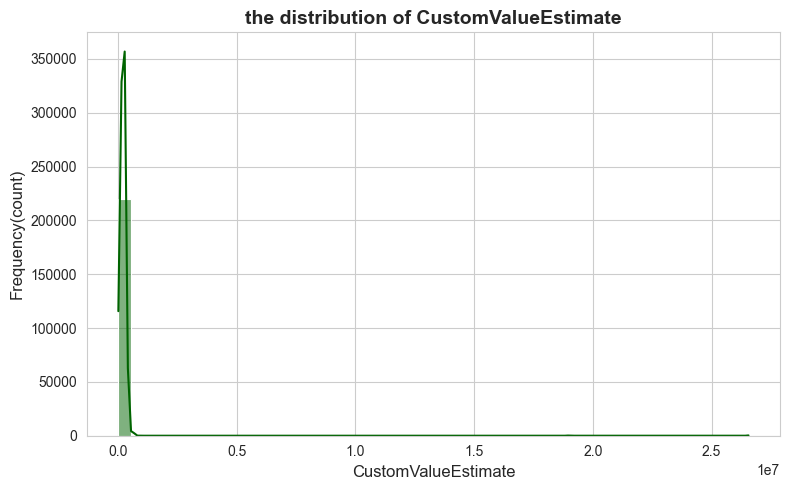

In [18]:
plot_numerical_distribution(df,'CustomValueEstimate')

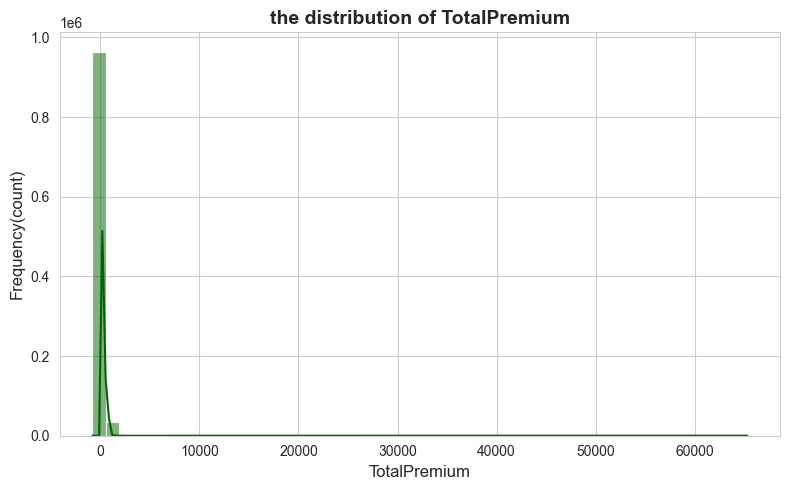

In [19]:
plot_numerical_distribution(df,'TotalPremium')

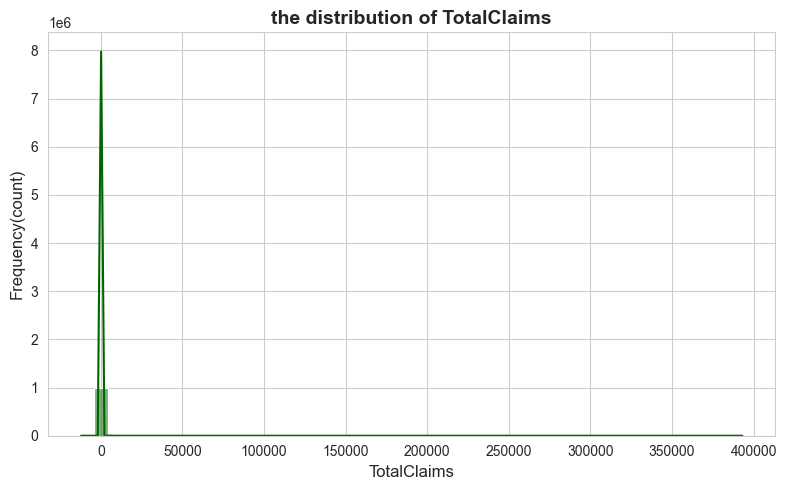

In [20]:
plot_numerical_distribution(df,'TotalClaims')

Analyze Catagorical Distribution (Barcharts)

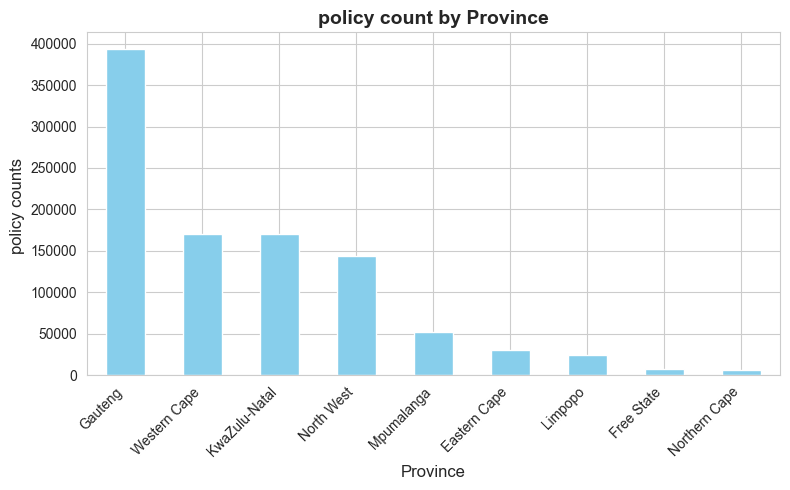

In [21]:
plot_categorical_distribution(df,'Province')

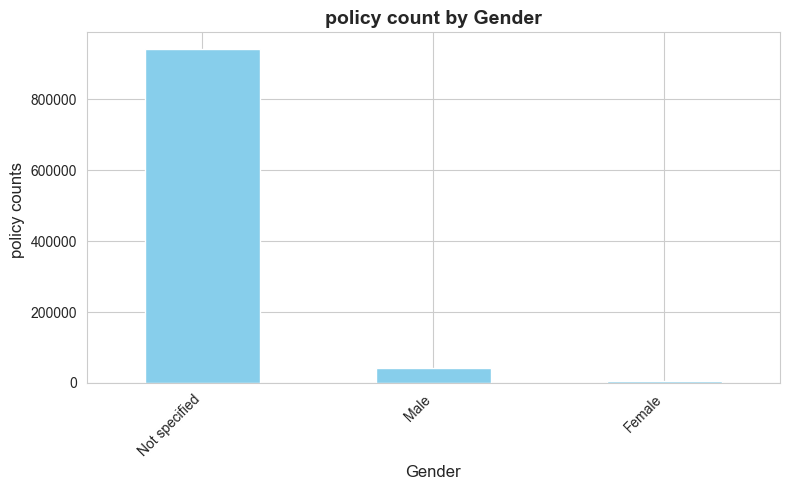

In [22]:
plot_categorical_distribution(df,'Gender')

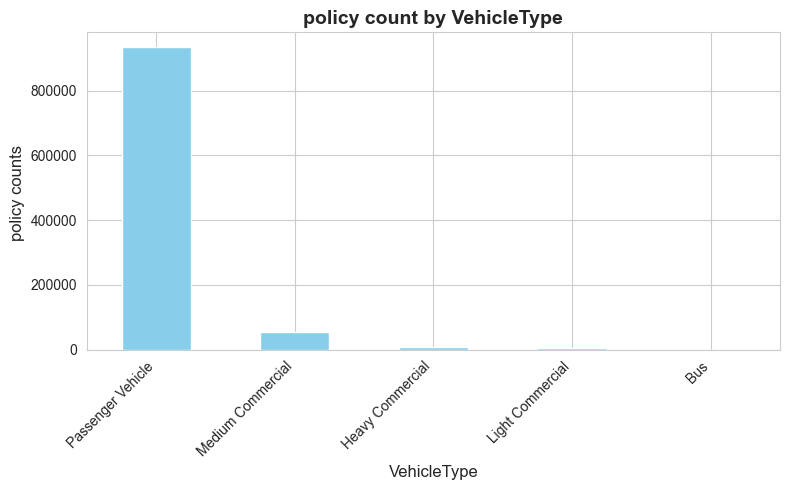

In [23]:
plot_categorical_distribution(df,'VehicleType')

Bivariate or Multivariate Analysis


In [24]:
zip_month_agg=analyze_zipcode_associations(df)
print(zip_month_agg)

Monthly Aggregation by PostalCode (Head)
   PostalCode     TransactionMonth  MonthlyClaims  MonthlyPremium  \
1           1  2013-12-01 00:00:00            0.0     1494.352315   
2           1  2014-01-01 00:00:00            0.0     1178.007368   
3           1  2014-02-01 00:00:00            0.0     1178.007368   
4           1  2014-03-01 00:00:00            0.0     1140.007131   
5           1  2014-04-01 00:00:00            0.0      770.907544   

   ClaimsChange  PremiumChange  
1 -50585.078947      61.611753  
2      0.000000    -316.344946  
3      0.000000       0.000000  
4      0.000000     -38.000238  
5      0.000000    -369.099587  

 Correlation Matrix (Premium Change vs. Claims Change)
               ClaimsChange  PremiumChange
ClaimsChange       1.000000       0.180381
PremiumChange      0.180381       1.000000
      PostalCode     TransactionMonth  MonthlyClaims  MonthlyPremium  \
1              1  2013-12-01 00:00:00            0.0     1494.352315   
2              1 

Visualization (Scatter Plot)

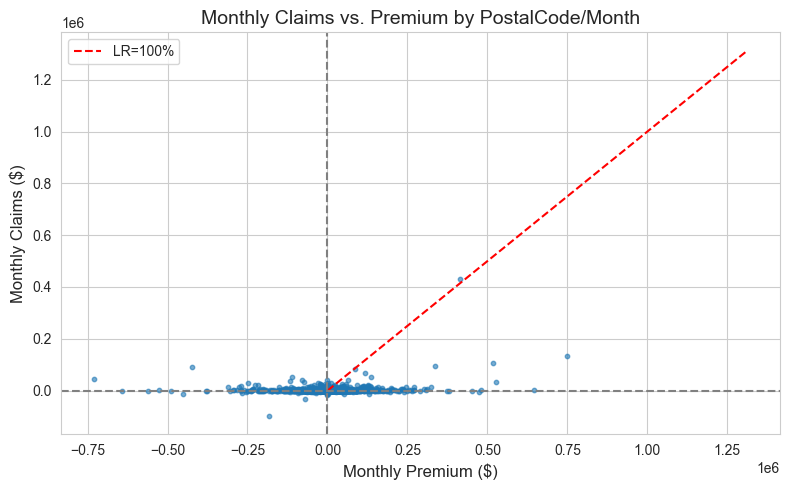

In [25]:
plot_zipcode_association(zip_month_agg)

Outlier Detection

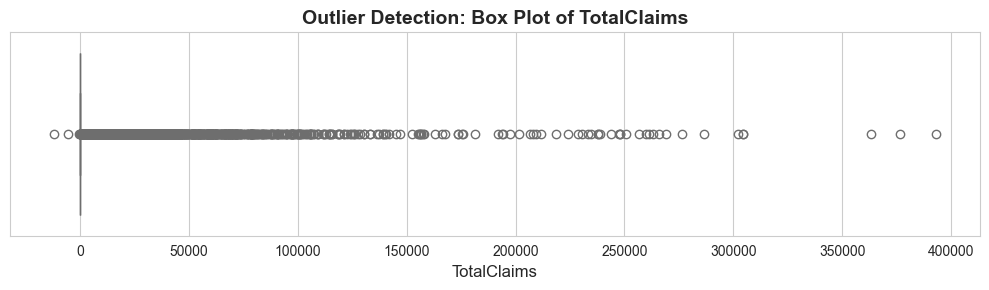

c:\Users\arwa\insurance-risk-analysis\notebooks\..\src\eda.py:131: RuntimeWarning: divide by zero encountered in scalar divide
  skew_pct = ((mean_with_outliers - mean_without) / mean_without) * 100



TotalClaims OUTLIER IMPACT ANALYSIS:
   Outliers detected: 2793 rows (0.3% of data)
   Mean with outliers: $65
   Mean without outliers: $0
   IMPACT: Outliers skew the mean by +inf%
   CONCLUSION: YES - outliers COULD skew analysis


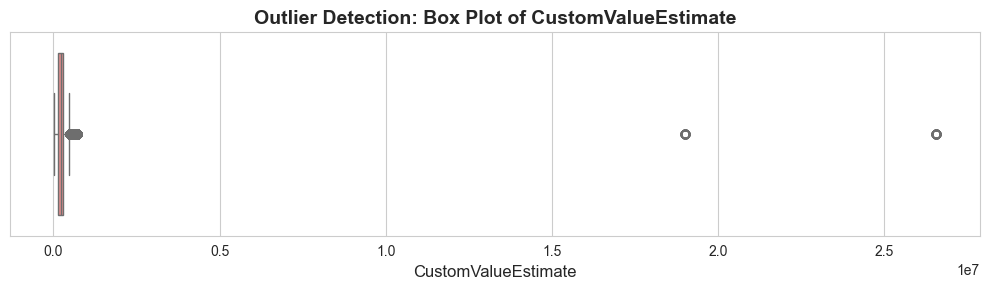


CustomValueEstimate OUTLIER IMPACT ANALYSIS:
   Outliers detected: 1785 rows (0.2% of data)
   Mean with outliers: $225,531
   Mean without outliers: $209,425
   IMPACT: Outliers skew the mean by +7.7%
   CONCLUSION: YES - outliers COULD skew analysis


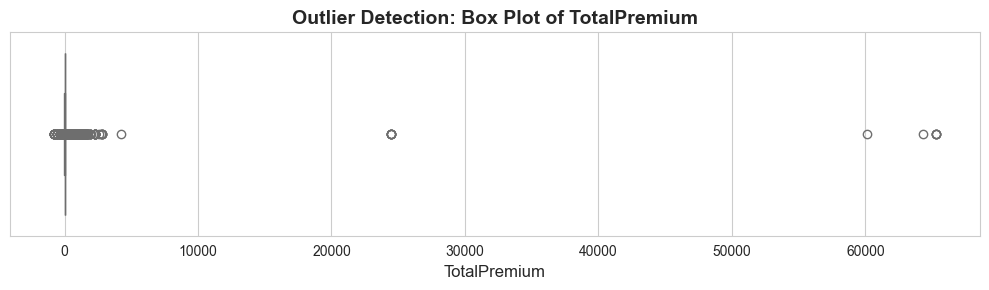


TotalPremium OUTLIER IMPACT ANALYSIS:
   Outliers detected: 209042 rows (20.9% of data)
   Mean with outliers: $62
   Mean without outliers: $4
   IMPACT: Outliers skew the mean by +1333.3%
   CONCLUSION: YES - outliers COULD skew analysis


In [26]:
claims_result = plot_outliers_box(df, 'TotalClaims')
value_result = plot_outliers_box(df, 'CustomValueEstimate')
results = plot_outliers_box(df,'TotalPremium')


Analyze Temporal Trend

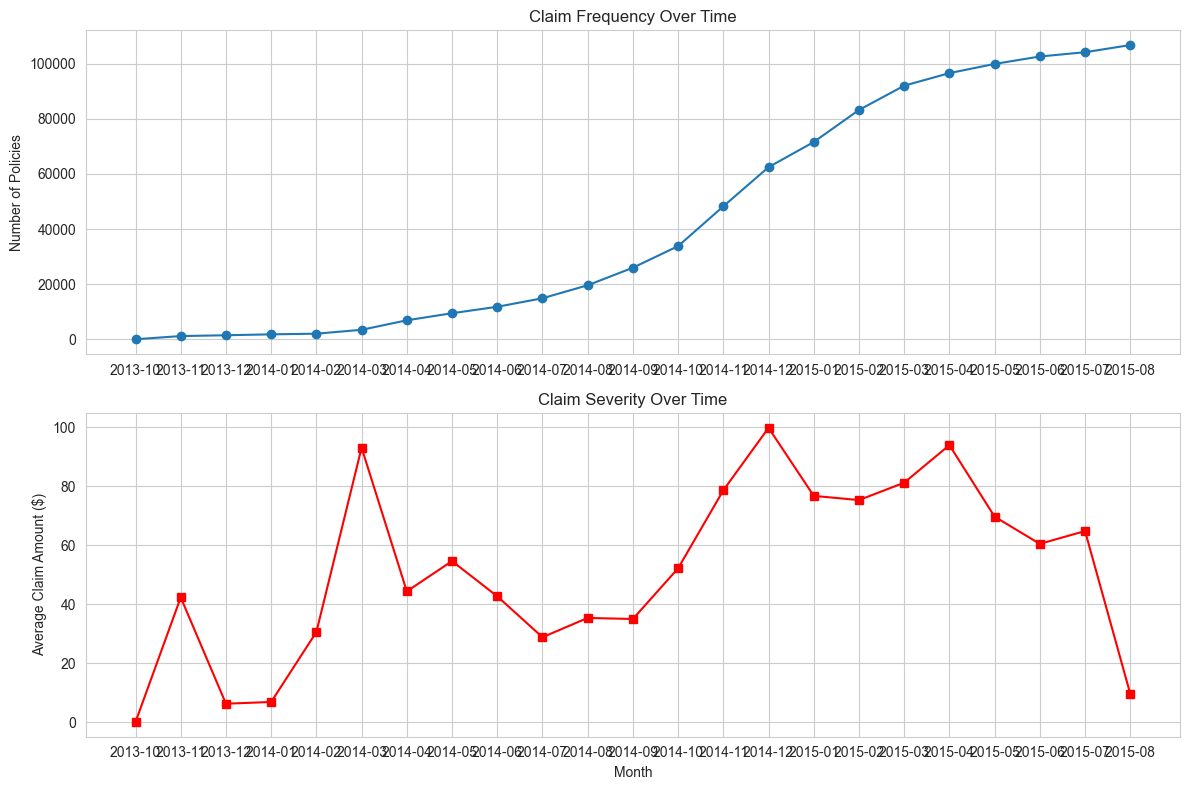

ANSWER:
 Claim Frequency changed by +237115.6%
 Claim Severity changed by +inf%


c:\Users\arwa\insurance-risk-analysis\notebooks\..\src\eda.py:177: RuntimeWarning: divide by zero encountered in scalar divide
  sev_change = (monthly['ClaimSeverity'].iloc[-1] /


'YES - Significant changes observed'

<Figure size 640x480 with 0 Axes>

In [27]:
analyze_temporal_trends_simple(df)

Trends over Geography

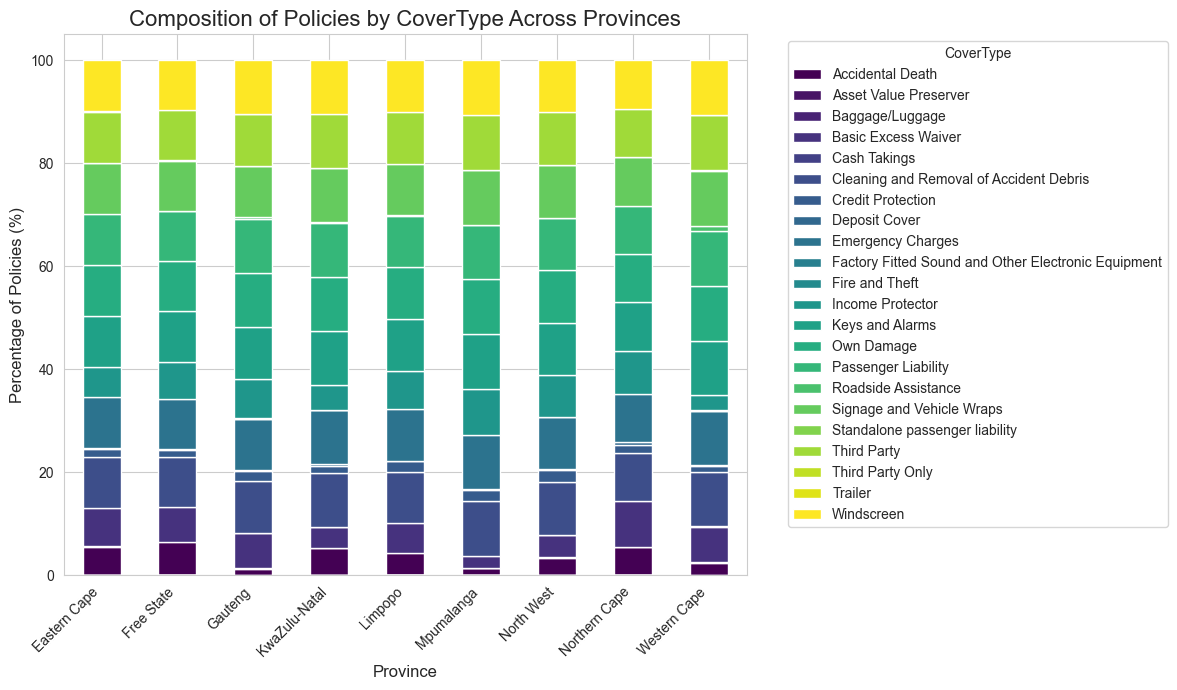

In [28]:
plot_composition_by_province(df, 'CoverType')

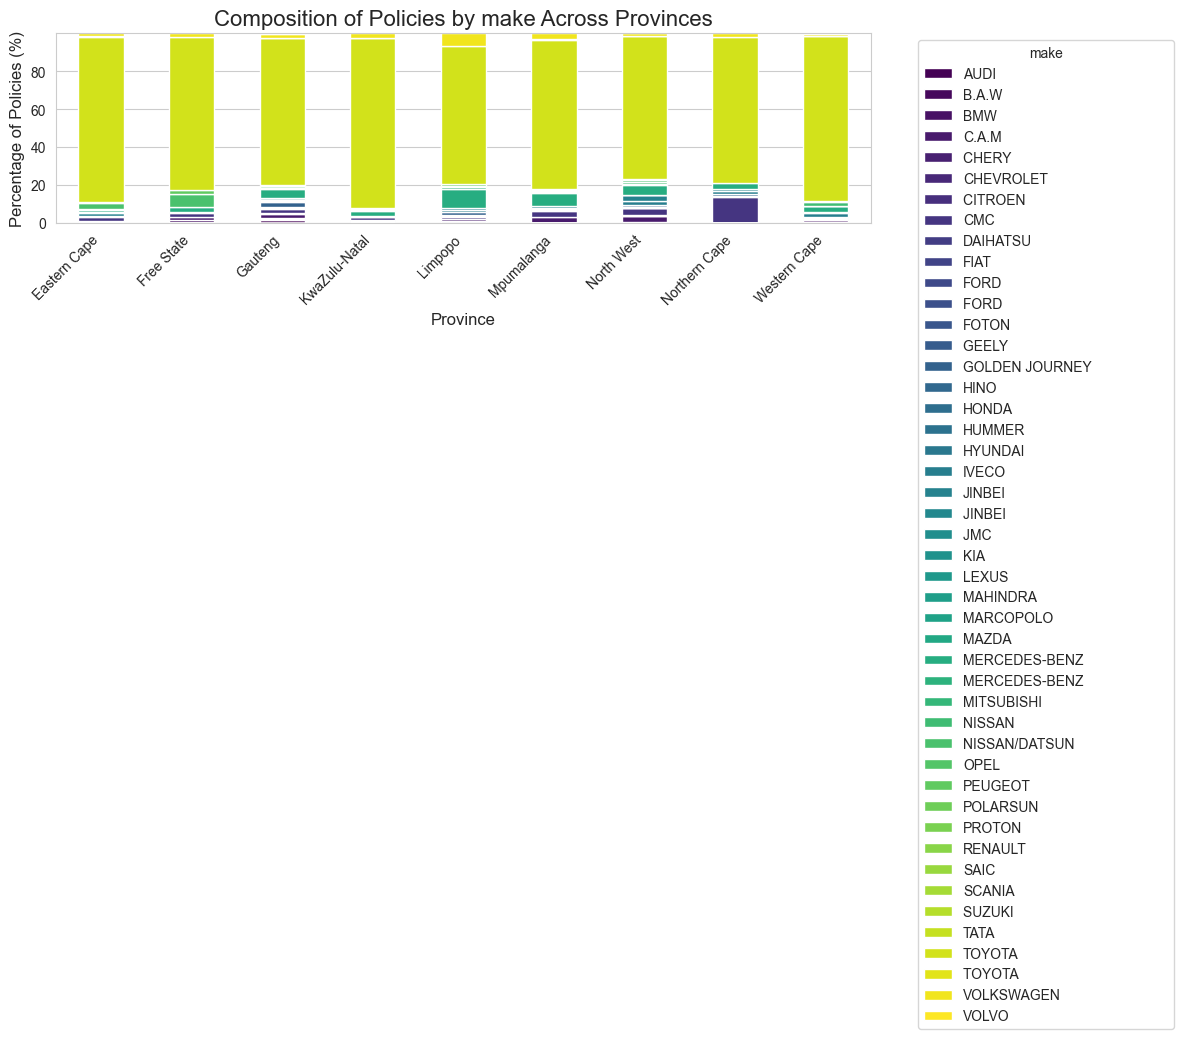

In [29]:
plot_composition_by_province(df, 'make')

In [30]:
premium_by_province = df.groupby('Province')['TotalPremium'].median().sort_values(ascending=False).reset_index()

print("\n Median Premium by Province")
print(premium_by_province)


 Median Premium by Province
        Province  TotalPremium
0     Free State      3.592281
1        Limpopo      3.172807
2  KwaZulu-Natal      2.683860
3   Eastern Cape      2.440702
4        Gauteng      2.148509
5     North West      1.833005
6     Mpumalanga      1.809386
7   Western Cape      1.724211
8  Northern Cape      1.504035


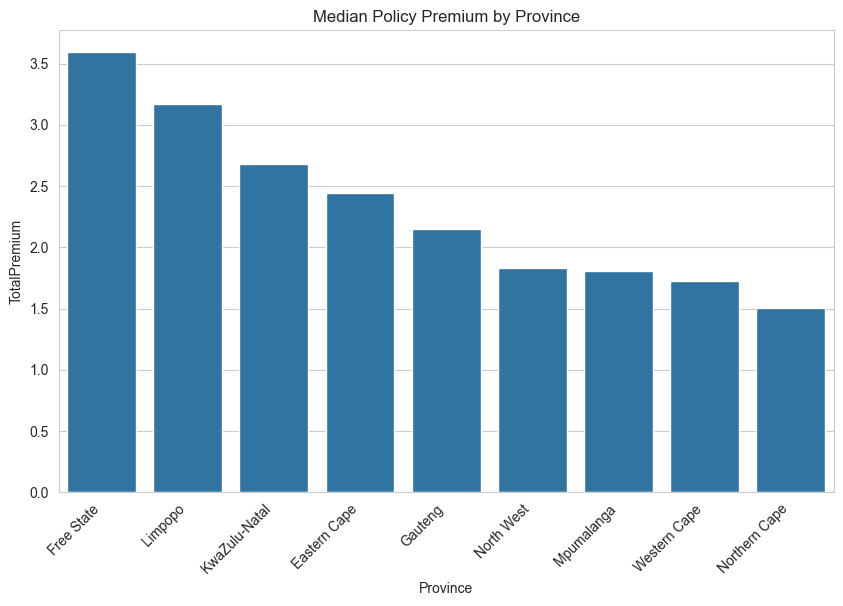

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='TotalPremium', data=premium_by_province)
plt.title('Median Policy Premium by Province')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig(f'mediam_premium_by_province.png')

Creative Visulization

c:\Users\arwa\insurance-risk-analysis\venv\Lib\site-packages\matplotlib\colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


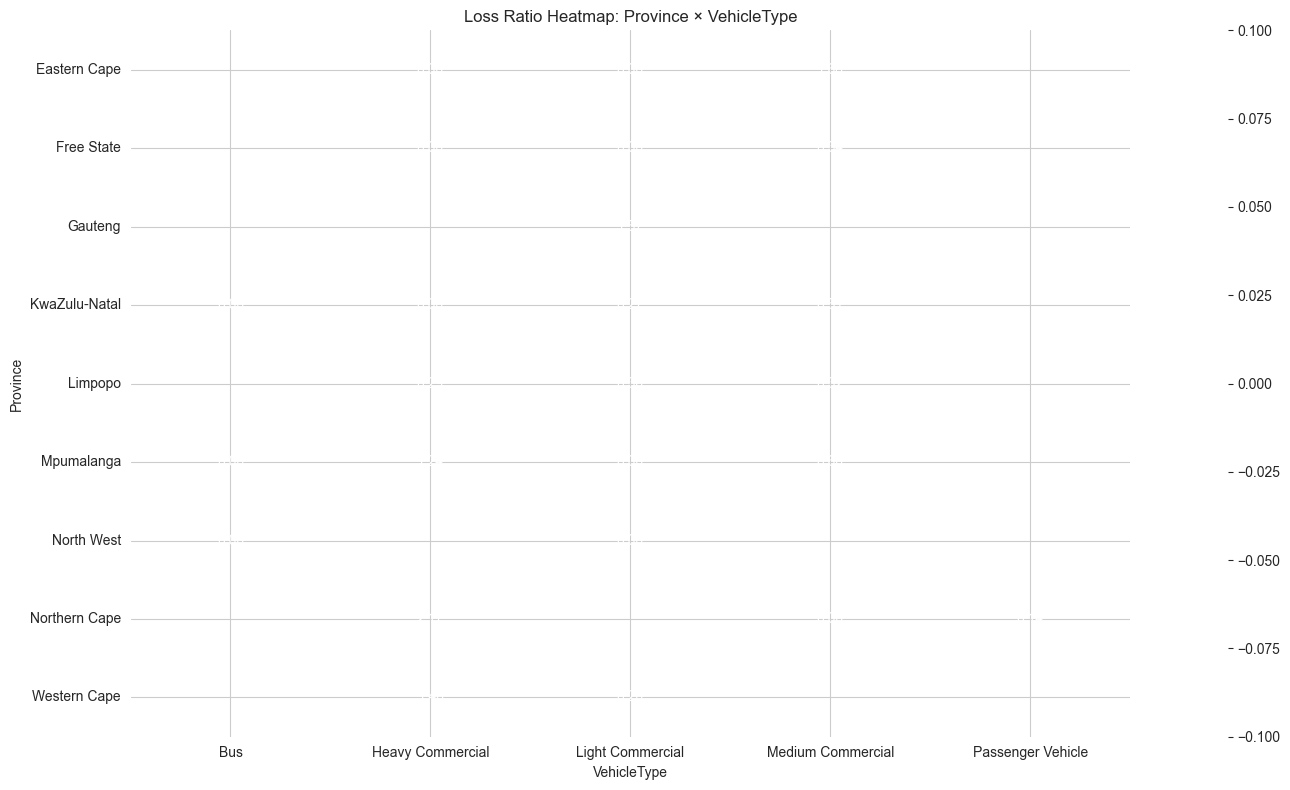

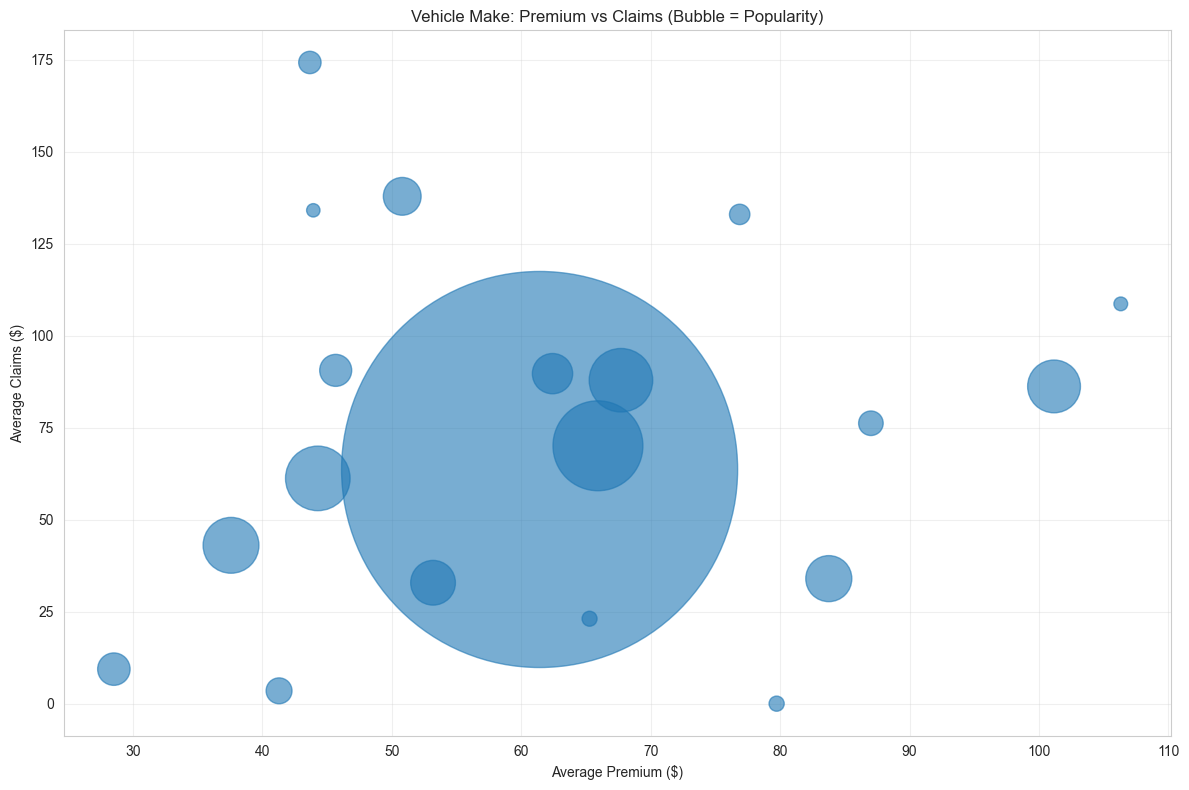

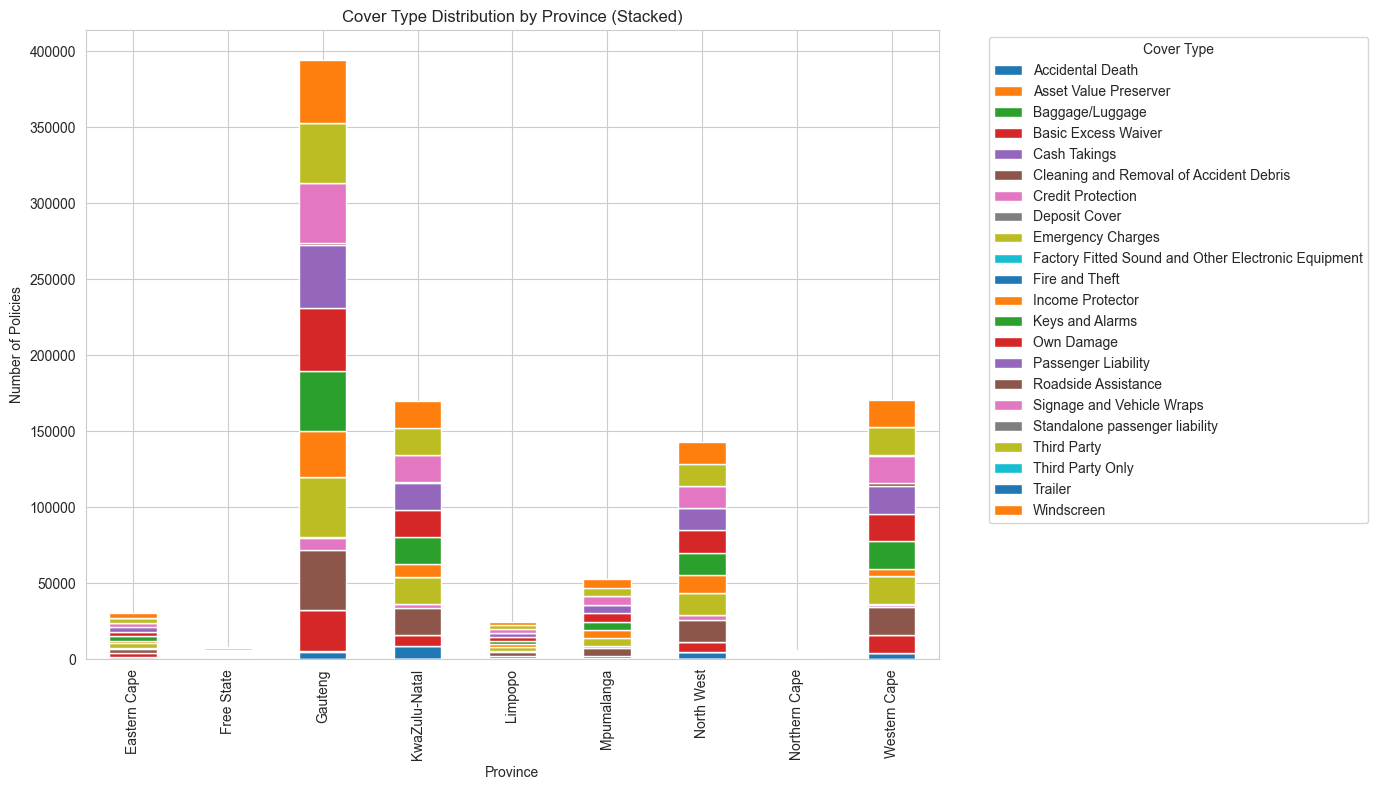

In [34]:

if 'LossRatio' not in df.columns:
    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    

heatmap_data = df.groupby(['Province', 'VehicleType'])['LossRatio'].mean().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='RdYlGn_r', center=1, annot=True, fmt='.2f')
plt.title('Loss Ratio Heatmap: Province × VehicleType')
plt.tight_layout()
plt.savefig('../docs/creative_heatmap.png', dpi=150)
plt.show()


bubble_data = df.groupby('make').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean',
    'PolicyID': 'count'
}).nlargest(20, 'PolicyID')

plt.figure(figsize=(12, 8))
plt.scatter(bubble_data['TotalPremium'], bubble_data['TotalClaims'], 
           s=bubble_data['PolicyID']/10, alpha=0.6)
plt.title('Vehicle Make: Premium vs Claims (Bubble = Popularity)')
plt.xlabel('Average Premium ($)')
plt.ylabel('Average Claims ($)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../docs/creative_bubble.png', dpi=150)
plt.show()


cover_by_province = pd.crosstab(df['Province'], df['CoverType'])
cover_by_province.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Cover Type Distribution by Province (Stacked)')
plt.xlabel('Province')
plt.ylabel('Number of Policies')
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('../docs/creative_stacked.png', dpi=150)
plt.show()